## Project Title: House Price Prediction
BY: Kawuribi Zakaria

## Description:
This project, aimed at developing a machine learning model that predicts the prices of houses based on various features such as location, size, number of bedrooms, number of bathrooms, amenities, and other relevant factors. I shall be using a dataset containing historical housing data, including features and corresponding sale prices, to train and evaluate the model.

## Dataset Description
This dataset provides comprehensive information for house price prediction, with 13 column names:

- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

### Importing needed libraries and modules
The following required libraries and modules have all been Installed and imported

In [1]:
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#For vectorizing and splitting data
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

#For training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#For model Evaluation
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Loading and Data Overview

In [2]:
housing_main = pd.read_csv("Housing.csv") #This is where the data is loaded into a DataFrame housing_main

housing = housing_main.copy() # A copy is made to ensure do data is lost from the origigal csv data file if any modifications are made

### Setting an index column as id

In [3]:
#Creating an a new column to store the indexes
housing.insert(0,'id',range(len(housing))) # The insert function takes the index of the column, name and content of the column
housing.index = housing['id']

### Exploratory Data Analysis (EDA)

In [4]:
#checking colums and dtypes
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                545 non-null    int64 
 1   price             545 non-null    int64 
 2   area              545 non-null    int64 
 3   bedrooms          545 non-null    int64 
 4   bathrooms         545 non-null    int64 
 5   stories           545 non-null    int64 
 6   mainroad          545 non-null    object
 7   guestroom         545 non-null    object
 8   basement          545 non-null    object
 9   hotwaterheating   545 non-null    object
 10  airconditioning   545 non-null    object
 11  parking           545 non-null    int64 
 12  prefarea          545 non-null    object
 13  furnishingstatus  545 non-null    object
dtypes: int64(7), object(7)
memory usage: 63.9+ KB


In [5]:
#viewing top 10 to confirm dtypes
housing.head(10)

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
id,,,,,,,,,,,,,,
0,0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [6]:
#viewing bottom 5
housing.tail()

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
id,,,,,,,,,,,,,,
540,540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
housing.describe().round()

,id,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0,545.0
mean,272.0,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,157.0,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,0.0,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,136.0,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,272.0,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,408.0,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,544.0,13300000.0,16200.0,6.0,4.0,4.0,3.0


<Axes: xlabel='price', ylabel='Count'>

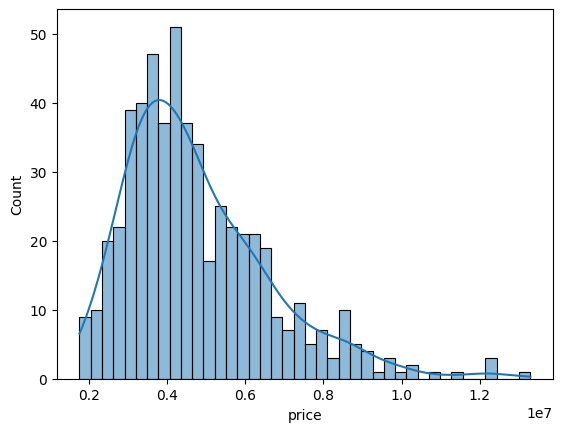

In [8]:
#checking for price distibution

sns.histplot(housing.price, bins= 40, kde = True)

In [9]:
housing.price

id
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

<Axes: xlabel='price'>

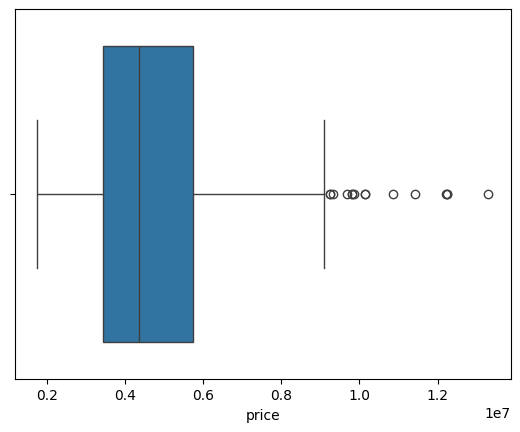

In [10]:
#Checking for outliers
sns.boxplot(data=housing, x='price')

In [11]:
#Checking the correlation between the independent variables and price
housing.select_dtypes(exclude='O').corr().price

id          -0.929878
price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [12]:
#Correlation measure between -1 to +1
#id: Correlation with price is -0.929878. This strong negative correlation (-0.7 to -1 %As one variable increases, the other decreases significantly). this is indicating that id is just an identifier and not meaningful for predicting price.
#price: Correlation with itself is 1.000000, which is expected as a variable is perfectly correlated with itself.
#area: Correlation with price is 0.535997. This indicates a moderate positive relationship; as the area increases, the price tends to increase.
#bedrooms: Correlation with price is 0.366494. This shows a weak positive relationship; more bedrooms are associated with higher prices, though the effect is not very strong.
#bathrooms: Correlation with price is 0.517545, indicating a moderate positive relationship.
#stories: Correlation with price is 0.420712, indicating a weak-to-moderate positive relationship.
#parking: Correlation with price is 0.384394, indicating a weak positive relationship((0.1 to 0.4) 

<Axes: >

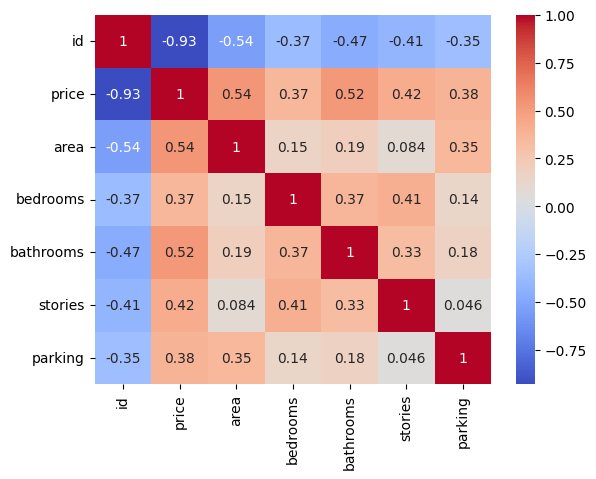

In [13]:
#A heatmap of the correlation between numerical variables
sns.heatmap(housing.select_dtypes(exclude='O').corr(), annot=True, cmap = 'coolwarm') #This part of the code selects only the numerical colums excluding the 'O' (objects)

In [14]:
#setting the features
features_data = housing[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]


In [15]:
# changing each observationl in the features table to dictionary
features_dict = features_data.to_dict(orient='records')

In [16]:
dv = DictVectorizer()
dv.fit(features_dict)

DictVectorizer()

## Splitting Dataset
- Training set 80% (This portion of the data is used to train the machine learning model. The model learns patterns and relationships between the features and the target variable (price in this case).
  
- Test dataset 20% (This portion of the data is set aside to evaluate the model's real-world performance and avoid overfitting but rather generalizing to unseen data).

In [17]:
#transforming the features_dict and storing it as features for the training
#storing the label data as 'label' for training
features = dv.transform(features_dict)
label = np.log1p(housing.price).values

In [18]:
#Splittin the data into 'x_train' and 'x_test' = features of training and testing data respectively. 'y_trian' and 'y_test' = label or predicted value for the training  and testing data respectively.
#The 'train_test_split' function can take two dataframes and split the firt dataframe('features' in this case) and assign it to the first two variables('x_train' and 'x_test' in this case) in 8:2 ratio respectively. Then it takes the second dataframe('label' in this case) then splits it for the third and fourth variable('y_train' and 'y_test') in 8:2 ratio.
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=8)

## Training with different models
In this section, I shall be training the data with different models to find the best model. Below are the sample models
- Decision Tree Regressor 
- Gradient Boosting Regressor
- Support Vector Regressor
- Linear Regression
- Random Forest Regressor

For each of the above models I will follow the same steps so I won't have to be commenting all through
1. Import the model and give it a variable name
2. Fit(train) the model('model.fit()') with the training('x_train') and the testing('y_train') data
3. Predict the labels for the testing data('model.predict(x_test)')
4. Calculate the root_mean_squared_error with the actual labe('y_test') and the predicted labels from 'model.predict(x_test)'
5. Similarly calculate the R2_Score for each model
6. Then calculate the mean squared error for each model

### Using Decision Tree Regressor

In [19]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [20]:
dtr_test_pred= dtr_model.predict(x_test)


In [21]:
dtr_rmse = root_mean_squared_error(y_test,dtr_test_pred)
print(f"The Root mean squared error = {round(dtr_rmse,3)}")


The Root mean squared error = 0.296


In [22]:
dtr_r2_score =r2_score(y_test,dtr_test_pred)
print(f"The R2 Score = {dtr_r2_score}")

The R2 Score = 0.3698438561662085


In [23]:
dtr_mse = mean_squared_error(y_test,dtr_test_pred)
print(f"The mean squared error = {dtr_mse}")

The mean squared error = 0.08784082458137785


### Using Gradient Boosting Regressor

In [24]:
gboost_model = GradientBoostingRegressor(learning_rate = .07,n_estimators = 500, verbose=0)
gboost_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.07, n_estimators=500)

In [25]:
gboost_test_pred= gboost_model.predict(x_test)

In [26]:
gboost_rmse = root_mean_squared_error(y_test,gboost_test_pred)
print(f"The Root mean squared error = {round(gboost_rmse,3)}")

The Root mean squared error = 0.203


In [27]:
gboost_r2_score =r2_score(y_test,gboost_test_pred)
print(f"The R2 Score = {gboost_r2_score}")

The R2 Score = 0.7055380419766114


In [28]:
gboost_mse = mean_squared_error(y_test,gboost_test_pred)
print(f"The mean squared error = {gboost_mse}")

The mean squared error = 0.04104662225977412


### Using Support Vector Regressor

In [29]:
svc_model = SVR()
svc_model.fit(x_train,y_train)

SVR()

In [30]:
svc_test_pred= svc_model.predict(x_test)

In [31]:
svc_rmse = root_mean_squared_error(y_test,svc_test_pred)
print(f"The Root mean squared error = {round(svc_rmse,3)}")

The Root mean squared error = 0.277


In [32]:
svc_r2_score =r2_score(y_test,svc_test_pred)
print(f"The R2 Score = {svc_r2_score}")

The R2 Score = 0.449851046469656


In [33]:
svc_mse = mean_squared_error(y_test,svc_test_pred)
print(f"The mean squared error = {svc_mse}")

The mean squared error = 0.07668819576475282


### Using Linear Regression 

In [34]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [35]:
lr_test_pred= lr_model.predict(x_test)

In [36]:
lr_rmse = root_mean_squared_error(y_test,lr_test_pred)
print(f" The root mean squared error ={lr_rmse}")

 The root mean squared error =0.18583299176338816


In [37]:
lr_r2_score =r2_score(y_test,lr_test_pred)
print(f"The R2 Score = {lr_r2_score}")

The R2 Score = 0.7522592726007342


In [38]:
lr_mse = mean_squared_error(y_test,lr_test_pred)
print(f"The mean squared error = {lr_mse}")

The mean squared error = 0.034533900827731494


### Using Random Forest Regressor

In [39]:
rf_model = RandomForestRegressor(n_estimators=1000,random_state=65)
rf_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=65)

In [40]:
rf_test_pred = rf_model.predict(x_test)

In [41]:
rf_rmse = root_mean_squared_error(y_test,rf_test_pred)
print(f"The Root mean squared error = {rf_rmse}")


The Root mean squared error = 0.20105513520009421


In [42]:
rf_r2_score = r2_score(y_test,rf_test_pred)
print(f"The R2 Score = {rf_r2_score}")

The R2 Score = 0.7100106083289512


In [43]:
rf_mse = mean_squared_error(y_test,rf_test_pred)
print(f"The mean squared error = {rf_mse}")

The mean squared error = 0.04042316739032816


### Summary
Below is a summary of the R2_Score, the root mean squred error (RMSR) and the mean squared error of each of the models

In [44]:
print(f"\033[1m For LinearRegression \033[0m \n The R2 Score = {lr_r2_score}\n The Root mean squared error = {round(lr_rmse,3)}\n The mean squred error = {lr_mse} \n")

print(f"\033[1m For RandomForestRegressor \033[0m\n The R2 Score = {rf_r2_score}\n The Root mean squared error = {round(rf_rmse,3)}\n The mean squred error = {rf_mse}\n")

print(f"\033[1m For Support Vector Regression \033[0m\n The R2 Score = {svc_r2_score}\n The Root mean squared error = {round(svc_rmse,3)}\n The mean squred error = {svc_mse}\n")

print(f"\033[1m For Gradient Boosting Regressor \033[0m\n The R2 Score = {gboost_r2_score}\n The Root mean squared error = {round(gboost_rmse,3)}\n The mean squred error = {gboost_mse}\n")

print(f"\033[1m For Decision Tree Regressor \033[0m\n The R2 Score = {dtr_r2_score}\n The Root mean squared error = {round(dtr_rmse,3)}\n The mean squred error = {dtr_mse}\n")


 For LinearRegression  
 The R2 Score = 0.7522592726007342
 The Root mean squared error = 0.186
 The mean squred error = 0.034533900827731494 

 For RandomForestRegressor 
 The R2 Score = 0.7100106083289512
 The Root mean squared error = 0.201
 The mean squred error = 0.04042316739032816

 For Support Vector Regression 
 The R2 Score = 0.449851046469656
 The Root mean squared error = 0.277
 The mean squred error = 0.07668819576475282

 For Gradient Boosting Regressor 
 The R2 Score = 0.7055380419766114
 The Root mean squared error = 0.203
 The mean squred error = 0.04104662225977412

 For Decision Tree Regressor 
 The R2 Score = 0.3698438561662085
 The Root mean squared error = 0.296
 The mean squred error = 0.08784082458137785

